# CS5228 Assignment 4 - Recommender Systems & Graph Mining

Hello everyone, this assignment notebook covers Recommender Systems & Graph Mining. There are some code-completion tasks and question-answering tasks in this answer sheet. For code completion tasks, please write down your answer (i.e., your lines of code) between sentences that "Your code starts here" and "Your code ends here". The space between these two lines does not reflect the required or expected lines of code. For answers in plain text, you can refer to [this Markdown guide](https://medium.com/analytics-vidhya/the-ultimate-markdown-guide-for-jupyter-notebook-d5e5abf728fd) to customize the layout (although it shouldn't be needed).

When you work on this notebook, you can insert additional code cells (e.g., for testing) or markdown cells (e.g., to keep track of your thoughts). However, before the submission, please remove all those additional cells again. Thanks!

**Important:**
* Rename and save this Jupyter notebook as **cs5228_a4_YourName_YourNUSNETID.ipynb** (e.g., **cs5228_a4_BobSmith_e12345678.ipynb**) before submission!
* Rename and save the script file *cs5228_a4.py* as **cs5228_a4_YourName_YourNUSNETID.py** (e.g., **cs5228_a4_BobSmith_e12345678.py**) before submission!
* Submission deadline is Nov XX, 11.59 pm. Late submissions will be penalized by 10% for each additional day. Failure to appropriately rename both files will yield a penalty of 1 Point. There is no need to use your full name if it's rather long; it's just  important to easily identify you in Canvas etc.

Please also add your NUSNET and student id in the code cell below. This is just to make any identification of your notebook doubly sure.

In [1]:
student_id = 'A0285647M'
nusnet_id = 'e1216292'

Here is an overview over the tasks to be solved and the points associated with each task. The notebook can appear very long and verbose, but note that a lot of parts provide additional explanations, documentation, or some discussion. The code and markdown cells you are supposed to complete are well, but you can use the overview below to double-check that you covered everything.

* **1 Recommender Systems (30 Points)**
    * 1.1 Content-based (User-Item Similarities) (7 Points)
        * 1.1 a) Calculate User Profile (5 Points)
        * 1.1 b) Calculate User-Item Similarities (2 Points)
    * 1.2 User-based Collaborative Filtering (7 Points)
        * 1.2 a) Calculate User-User Similarities (5 Points)
        * 1.2 b) Calculate Estimated Rating (2 Points)
    * 1.3 Matrix Factorization (16 Points)
        * 1.3 a) Implement Non-Negative Matrix Factorization (8 Points)
        * 1.3 b) Hyperparameter Exploration (3 Points)
        * 1.3 c) Matrix Factorization & Updates (5 Points)
* **2 Graph Mining (20 Points)**
    * 2.1 Implementing Closeness Centrality (4 Points)
    * 2.2 Implementing PageRank Centrality (8 Points)
    * 2.3 Comparing Centrality Measures (8 Points)
        * 2.3 a) Run Off-The-Shelf Centrality Algorithms (3 Points)
        * 2.3 b) Discussion of Results (5 Points)

## Setting up the Notebook

### Enable Auto-Reload

This ensures that any saved changes to your `.py` file gets automatically reloaded.

In [2]:
%load_ext autoreload
%autoreload 2

### Enable "Inline Plotting"

In [3]:
%matplotlib inline

### Importing Required Packages

In [4]:
import numpy as np
import pandas as pd
import networkx as nx

from src.utils import plot_mrt_graph

**Important:** This notebook also requires you to complete in a separate `.py` script file. This keeps this notebook cleaner and simplifies testing your implementations for us. As you need to rename the file `cs5228_a4.py`, you also need to edit the import statement below accordingly.

In [5]:
from cs5228_a4_ParasharaRamesh_e1216292 import *
#from cs5228_a4_BobSmith_e12345678 import get_noise_dbscan # <-- you will need to rename this accordingly

---

## 1 Recommender Systems


### 1.1 Content-based (User-Item Similarities) (7 Points)

The [Spotify Dataset 1921-2020](https://www.kaggle.com/yamaerenay/spotify-dataset-19212020-160k-tracks) contains over 175,000 songs with both [audio features](https://developer.spotify.com/documentation/web-api/reference/#endpoint-get-audio-features) and [track features](https://developer.spotify.com/documentation/web-api/reference/#endpoint-get-track). For this task, we look at 6 different songs an individual user $u$ has rated, and limit ourselves to 4 audio features, all ranging from 0 to 1. Note that this is somewhat different to the example from the lecture where we had only 0 or 1 as feature values -- recall that our features were only binary indicating whether a movie belonged to a certain genre. However, this does not change the calculation.

**Important:** The ratings are not part of the dataset but manually added for this task. The range of the ratings is from 1 to 10.

In [6]:
df = pd.read_csv('data/a4-spotify-sample.csv')

df.head(6)

,acousticness,danceability,energy,liveness,rating
0,0.93,0.32,0.14,0.18,9
1,0.11,0.85,0.82,0.09,2
2,0.75,0.36,0.39,0.12,7
3,0.84,0.50,0.24,0.13,8
4,0.88,0.33,0.18,0.09,8
5,0.11,0.76,0.69,0.09,2


#### 1.1 a) Calculate User Profile (5 Points)

Calculate the user profile vector $v_u$ based on $u$'s rating history! Please complete the equation by adding the profile vector in the markdown cell below; use a precision of 2 decimals for all vector values.

**Important:** Show at least for one element in the profile vector how you calculated the value in detail. You can use an additional code or markdown cell.

**Your answer:**

1. Find the mean of all the ratings
$$\mu_r = \frac{\Sigma_{i=1}^{6} r_i}{6}$$

In [7]:
mu_rating = df["rating"].mean()
print(f"avg rating is {mu_rating}")

avg rating is 6.0


2. Subtract each rating from the mean of the ratings
$$r'_i = r_i  - \mu_r$$

In [8]:
df["rating"] = df["rating"] - mu_rating
print("New rating values")
df["rating"].head()

New rating values


0    3.0
1   -4.0
2    1.0
3    2.0
4    2.0
Name: rating, dtype: float64

3. Find the new value for acousticness
$$a' = \frac{\Sigma_{i=1}^{6} r'_i.a_i}{6}$$

In [9]:
df["acousticness"] = df["acousticness"] * df["rating"]
user_acousticness_val = df["acousticness"].mean()
print(f"user's acousticness value is {user_acousticness_val}")

user's acousticness value is 1.0166666666666666


4. Find the new value for danceability
$$d' = \frac{\Sigma_{i=1}^{6} r'_i.d_i}{6}$$

In [10]:
df["danceability"] = df["danceability"] * df["rating"]
user_danceability_val = df["danceability"].mean()
print(f"user's danceability value is {user_danceability_val}")

user's danceability value is -0.5766666666666667


5. Find the new value for energy
$$e' = \frac{\Sigma_{i=1}^{6} r'_i.e_i}{6}$$

In [11]:
df["energy"] = df["energy"] * df["rating"]
user_energy_val = df["energy"].mean()
print(f"user's energy value is {user_energy_val}")

user's energy value is -0.7316666666666666


6. Find the new value for liveness
$$l' = \frac{\Sigma_{i=1}^{6} r'_i.l_i}{6}$$


In [12]:
df["liveness"] = df["liveness"] * df["rating"]
user_liveness_val = df["liveness"].mean()
print(f"user's liveness value is {user_liveness_val}")

user's liveness value is 0.06333333333333334


7. Final vector
$$v_u = [a', d', e', l']$$
$$v_u = [1.0166666666666666, -0.5766666666666667, -0.7316666666666666, 0.06333333333333334]$$

#### 1.1 b) Calculate User-Item Similarities (2 Points)

Calculate all cosine similarities between user $u$ and 2 new songs as defined by their feature values! Please complete the table and the statement below; use a precision of 2 decimals for the similarity values. Based on your results, which of the 2 songs should be recommended to the user?

|      | acousticness | danceability | energy | liveness | cosine similarity |
| ---  | ---          | ---          | ---    | ---      |-------------------|
| A    | 0.24         | 0.72         | 0.43   | 0.02     | **-0.40**         |
| B    | 0.79         | 0.32         | 0.12   | 0.09     | **0.45**          |

The song we should recommend to user $u$ is: **B because the cosine similarity is higher**

In [13]:
def cosine_similarity(x, y):
    mag_x = np.linalg.norm(x)  #the magnitude of the vector
    mag_y = np.linalg.norm(y)  #the magnitude of the vector
    return np.dot(x, y) / (mag_x * mag_y)


user_vector = np.array([1.0166666666666666, -0.5766666666666667, -0.7316666666666666, 0.06333333333333334])
A = np.array([0.24, 0.72, 0.43, 0.02])
B = np.array([0.79, 0.32, 0.12, 0.09])

cosine_sim_u_and_A = cosine_similarity(user_vector, A)
print(f"user & A cosine similarity is {cosine_sim_u_and_A}")

cosine_sim_u_and_B = cosine_similarity(user_vector, B)
print(f"user & B cosine similarity is {cosine_sim_u_and_B}")

#clearly B is the winner!


user & A cosine similarity is -0.4023054258608007
user & B cosine similarity is 0.44910822279380574


### 1.2 User-based Collaborative Filtering (7 Points)

Given to you is a simple rating dataset containing 6 users $u_1, u_2, \dots, u_6$, 8 songs $s_1, s_2, \dots, s_8$, and the rating matrix $R$:

$$
R = 
\begin{bmatrix} 
    4 & 0 & 0 & 3 & 5 & 0 & 1 & 4 \\
    3 & 0 & 0 & 3 & 4 & 1 & 2 & 0 \\
    1 & 0 & 0 & 2 & 0 & 5 & 4 & 2 \\
    4 & 0 & 0 & 4 & 0 & 2 & 1 & 5 \\
    3 & 3 & 0 & 2 & 4 & \mathbf{\color{red} ?}  & 1 & 2 \\
    0 & 1 & 0 & 3 & 4 & 2 & 1 & 4
\end{bmatrix}
$$

In this example, the range of the ratings are from 1 to 5.

Your overall task is to find the best estimate for rating $R_{u_5,s_6}$ of user $u_5$ for song $s_6$, indicated by the red question mark in rating matrix $R$.

#### 1.2 a) Calculate User-User Similarities (5 Points)

Calculate all cosine similarities between user $u_5$ and all other users! (5 Points)! Please complete the list of equations in the markdown below; please use a precision of 2 decimals.

**Important:** Show at least for one equation how you calculate the similarity in detail. You can use an additional code or markdown cell.

**Your answer:**

Shown below is the equation for how to calculate the similarity between two rows say row1 and row5. (will show the rest with code)

1. Normalize row1
* $\mu_{u_1} = \frac{\Sigma_{i=1}^{N} R_{1,s}}{N}$ (Where N is the number of non zero values, and $R_{1,s}$ represents the sth song rating of the 1st user)
* => $\frac{4+3+5+1+4}{5} = 3.4$
* $R'_{1,s} = R_{1,s} - \mu_{u_1}$ (subtract element wise but do not subtract whereever $R_{1,s}$ is zero or missing)
* => \[4-3.4,0,0,3-3.4,5-3.4,0,1-3.4,4-3.4\] = \[0.6, 0, 0, -0.4, 1.6, 0, -2.4, 0.6\]

2. Normalize row5
* $\mu_{u_5} = \frac{\Sigma_{i=1}^{N} R_{5,s}}{N}$ (Where N is the number of non zero values, and $R_{5,s}$ represents the sth song rating of the 1st user)
* => $\frac{3+3+2+4+1+2}{6} = 2.5 $
* $R'_{5,s} = R_{5,s} - \mu_{u_5}$ (subtract element wise but do not subtract whereever $R_{5,s}$ is zero or missing)
* => \[3-2.5, 3-2.5, 0 , 2-2.5\, 4-2.5, 0, 1-2.5, 2-2.5] = \[0.5, 0.5, 0, -0.5, 1.5, 0, -1.5, -0.5\]

3. Find similarity between row1 and row5
* $sim(1,5) = \frac{R'_1.R'_5}{|R'_1|*|R'_5|} $ (where the numerator '.' represents the vector dot product and the |x| operator represents the magnitude)
* $sim(1,5) = \frac{0.6*0.5 + 0*0.5 + 0*0 + (-0.4)(-0.5) + 1.6*1.5 + 0*0 + (-2.4)(-1.5) + (0.6)(-0.5)}{\sqrt{0.6^2 + (-0.4)^2 + 1.6^2 + (-2.4)^2 + 0.6^2}*\sqrt{0.5^2 + 0.5^2 + (-0.5)^2 + 1.5^2 + (-1.5)^2} + (-0.5)^2} = \frac{6.199}{3.033 * 2.345} = 0.8715$

* sim($u_5$, $u_1$) = **0.87** (Adding this explicitly so that it helps in calculating the next values)
* sim($u_5$, $u_2$) = **0.56**
* sim($u_5$, $u_3$) = **-0.24**
* sim($u_5$, $u_4$) = **0.31**
* sim($u_5$, $u_5$) = **1.0**
* sim($u_5$, $u_6$) = **0.38**

**NOTE: Refer to the cells below for how each values were calculated.**

In [14]:
#Input ratings matrix
u1 = np.array([4, 0, 0, 3, 5, 0, 1, 4])
u2 = np.array([3, 0, 0, 3, 4, 1, 2, 0])
u3 = np.array([1, 0, 0, 2, 0, 5, 4, 2])
u4 = np.array([4, 0, 0, 4, 0, 2, 1, 5])
u5 = np.array([3, 3, 0, 2, 4, 0, 1, 2])
u6 = np.array([0, 1, 0, 3, 4, 2, 1, 4])

# calculate_mean
mu_1 = np.mean(u1[u1 != 0])
mu_2 = np.mean(u2[u2 != 0])
mu_3 = np.mean(u3[u3 != 0])
mu_4 = np.mean(u4[u4 != 0])
mu_5 = np.mean(u5[u5 != 0])
mu_6 = np.mean(u6[u6 != 0])

#normalized values
n_u1 = np.where(u1 != 0, u1 - mu_1, u1)
n_u2 = np.where(u2 != 0, u2 - mu_2, u2)
n_u3 = np.where(u3 != 0, u3 - mu_3, u3)
n_u4 = np.where(u4 != 0, u4 - mu_4, u4)
n_u5 = np.where(u5 != 0, u5 - mu_5, u5)
n_u6 = np.where(u6 != 0, u6 - mu_6, u6)

#compute the similarity scores
sim_u15 = cosine_similarity(n_u1, n_u5)
sim_u25 = cosine_similarity(n_u2, n_u5)
sim_u35 = cosine_similarity(n_u3, n_u5)
sim_u45 = cosine_similarity(n_u4, n_u5)
sim_u55 = cosine_similarity(n_u5, n_u5)
sim_u65 = cosine_similarity(n_u6, n_u5)

# Print the cosine similarities
print(f"Cosine similarity u5 & u1 is {sim_u15}")
print(f"Cosine similarity u5 & u2 is {sim_u25}")
print(f"Cosine similarity u5 & u3 is {sim_u35}")
print(f"Cosine similarity u5 & u4 is {sim_u45}")
print(f"Cosine similarity u5 & u5 is {sim_u55}")
print(f"Cosine similarity u5 & u6 is {sim_u65}")

Cosine similarity u5 & u1 is 0.8715984135290764
Cosine similarity u5 & u2 is 0.5609681940050744
Cosine similarity u5 & u3 is -0.24652466565114897
Cosine similarity u5 & u4 is 0.31139957766460924
Cosine similarity u5 & u5 is 1.0
Cosine similarity u5 & u6 is 0.3804429551263411


#### 1.2 b) Calculate Estimated Rating (2 Points)

Calculate the estimated rating $R_{u_5,s_6}$! Consider the 2 most similar users for this calculation. Show how you arrived at this result! You can use an additional code or markdown cell.

**Your answer:**

From the above rows it looks like users 1 & 2 are the most similar to user 5.

Therefore,
$R_{u_5,s_6} = \frac{sim(u5,u1) * R_{1,6} + sim(u5, u2) * R_{2,6}}{sim(u5,u1) + sim(u5, u2)} = \frac{0.8715*0 + 0.5609*1}{0.8715 + 0.5609} = \frac{0.5609}{1.4324} = 0.3915$


### 1.3 Matrix Factorization (16 Points)

Matrix Factorization -- and here more specifically: non-negative Matrix Factorization -- is a class of algorithms where a matrix $M$ is factorized into (usually) two matrices $W$ and $H$, with the property that all three matrices have no negative elements. Matrix Factorization is popular techniques applied in recommender systems, where $W$ and $H$ contain a latent representation of all users and all items, respectively, and $M$ represents the rating matrix.

In this task, you will implement (non-negative) Matrix Factorization from scratch using Gradient Descent as covered in the lecture. In fact, we use the rating matrix $M$ which was used as an example in the lecture:

In [15]:
M = np.array([
    [4, 0, 0, 5, 1, 0, 0],
    [5, 5, 4, 0, 0, 0, 0],
    [0, 0, 0, 2, 4, 5, 0],
    [0, 3, 0, 0, 0, 0, 3]
], dtype=np.float16)

print(M)

[[4. 0. 0. 5. 1. 0. 0.]
 [5. 5. 4. 0. 0. 0. 0.]
 [0. 0. 0. 2. 4. 5. 0.]
 [0. 3. 0. 0. 0. 0. 3.]]


We provide you with the skeleton code for class `NMF` (short for Non-Negative Matrix Factorization). The code includes the initialization of matrices `W` and `H`, as well as of Matrix `Z`. Matrix `Z` is an auxiliary matrix containing the indices of all non-zero entries of Matrix `M`. Recall from the lecture that we need to compute the Gradient Descent based only on the non-zero entries in the rating matrix.

The code cell below shows an example using the default parameter (`k=100`). The shapes of `W` and `H` reflect the number of users and items, as well as the size $k$ of the latent representations. The shape of `Z` is `(num_nonzero, 2)`. For example matrix `M`, the shape should be `(11, 2)` since `M` has 11 non-zero entries.

In [16]:
np.random.seed(0)

nmf = NMF(M)

print('W.shape = {}'.format(nmf.W.shape))
print('H.shape = {}'.format(nmf.H.shape))
print('Z.shape = {}'.format(nmf.Z.shape))
print()
print('Z containing all the indices of all non-zero entries in M (first 5 entries only)')
print(nmf.Z[:5])

W.shape = (4, 100)
H.shape = (100, 7)
Z.shape = (11, 2)

Z containing all the indices of all non-zero entries in M (first 5 entries only)
[[0 0]
 [0 3]
 [0 4]
 [1 0]
 [1 1]]


We also provide you with the method `calc_loss()` which calculates the loss w.r.t. the current values of matrices `W` and `H`. **Important:** Note that method implements the loss without regularization! Since we need this method only to print the loss and so to see its trend over time, this simplified calculation is sufficient.

In [17]:
np.random.seed(0)

nmf = NMF(M)

loss = nmf.calc_loss()

print('Initial loss: {:.1f}'.format(loss))

Initial loss: 4879.6


#### 1.3 a) Implement Non-Negative Matrix Factorization (8 Points)

Implement method `fit()` to perform matrix factorization using Gradient Descent! The complete algorithm together with the required gradients is available as pseudo code in the lecture slides, and you are already familiar with the basic concept of Gradient Descent. Here, consider the regularization terms when calculating the gradients.

In [18]:
np.random.seed(0)

nmf = NMF(M)

nmf.fit(verbose=True)

Loss: 4638.72147 	 0%
Loss: 2911.73392 	 10%
Loss: 1931.49005 	 20%
Loss: 1330.81092 	 30%
Loss: 942.49529 	 40%
Loss: 681.48014 	 50%
Loss: 500.80400 	 60%
Loss: 372.86762 	 70%
Loss: 280.63586 	 80%
Loss: 213.17450 	 90%
Loss: 167.59880 	 100%


With the default values for all parameters  (`k=100`, `learning_rate=0.0001`, `lambda_reg=0.1`, `num_iter=100`), you should see a loss around **167.6** at the end of the training.

**Important:** There are 2 different but equally fine solutions to implement Gradient Descent. Either
* Calculate gradient with respect to w_u
* Calculate gradient with respect to h_v
* Update w_u
* Update h_v

or:

* Calculate gradient with respect to w_u
* Update w_u
* Calculate gradient with respect to h_v
* Update h_v

Both solutions are correct, but you should appreciate the subtle difference. The reference solution follows the first approach, the algorithm on the lecture slides follows the second approach. So if you use the second approach, your output will be slighly different, the loss at the end won't be exactly 167.6 (but very similar).

**Predicting unknown ratings (nothing for you to do here).** With our learned estimates for `W` and `H`, we can simply calculate matrix `P` as the product of `W` and `H`, representing the matrix of predicted ratings. We encapsulate this simple computation in method `predict()`.

In [19]:
P = nmf.predict()

print(np.around(P, 2))

[[ 7.02 10.17 11.97  7.85  5.61 10.61 12.52]
 [ 7.75  6.9   8.05 11.22  9.09 14.9  13.09]
 [ 9.65  8.96 10.37  7.02  6.81  8.33 10.76]
 [ 9.11  7.25 10.69 11.67  9.07 12.4   9.27]]


With the default values for all parameters  (`k=100`, `learning_rate=0.0001`, `lambda_reg=0.1`, `num_iter=100`), the result should look something like this:

```
[[ 7.02 10.17 11.97  7.85  5.61 10.61 12.52]
 [ 7.75  6.9   8.05 11.22  9.09 14.9  13.09]
 [ 9.65  8.96 10.37  7.02  6.81  8.33 10.76]
 [ 9.11  7.25 10.69 11.67  9.07 12.4   9.27]]
```

#### 1.3 b) Hyperparameter Exploration (3 Points)

Explore different hyperparameter settings and briefly explain your observations! You can use the code cell below for that; you can simply set different values for `k`, `learning_rate`, `lambda_reg`, and `num_iter`.

**Your answer:**

1. <u>K:</u>
* <u>Low K:</u>
    - The loss value here is 43.16182
    - In this case, the model is capturing a reasonable approximation of the original matrix with a lower-dimensional representation (k=10).
    - However, it is most likely underfitting in this case as this loss value could be more lower
* <u>High K:</u>
    - The loss value here is 0.06771
    - The extremely low loss value indicates the model is overfitting the training data.
    - The high-dimensional representation (k=1000) allows the model to memorize the training examples, but it might not generalize well to new data.
    - High values like 51 and 60 in place of 0 might be a result of the model capturing noise in the data due to overfitting.
<br>

2. <u>Learning rate:</u>
* <u>Low Learning rate:</u>
    - The learning rate in the default setting is what I am considering as low learning rate.
    - This approach results in a final loss of 167.59
    - The convergence and decrease of loss values every iteration is gradual & slow, but could be faster considering how other experiments
* <u>High Learning rate:</u>
    - The final loss here is 0.07029
    - The rapid convergence with a low loss suggests the model is learning quickly.
    - Generally speaking, a too high learning rate might lead to overshooting and instability but based on the reconstructions of the original matrix running it for a few more epochs might reach to an optimal configuration.
<br>

3. <u>Lambda reg:</u>
* <u>Low lambda:</u>
    - The final loss with low lambda of 0.001 is 158.87566
    - A lower regularization term (lambda) allows the model to fit the data more closely by ensuring that the model does not overfit.
    - In this case however, because the lambda value is very low it is still prone to overfitting which becomes more evident when running this configuration for more iterations which results in a final loss of 0.0
* <u>High lambda:</u>
    - The final loss with high lambda of 1 is 138.0035
    - A lower regularization term (lambda) allows the model to fit the data more closely by ensuring that the model does not overfit.
    - In this case however, because the lambda value is very high it might be prone to underfitting as it tries to prevent overfitting as is evident from the large loss value
<br>

4. <u>Num iter:</u>
* <u>Low iterations</u>
    - The final loss with low iterations ( which is the default configuration ) is 167.59
    - Generally speaking running the same configuration for lesser number of iterations means that the model might not be able to converge to the optimal state possible resulting in higher loss values.
* <u>High iterations</u>
    - The final loss with more iterations (of 9999) is around 0.05445
    - The high number of iterations allows the model to try converging to a very low loss.
    - The reconstructed matrix appears reasonable and likely captures more intricate patterns.
    - However, there's a risk of overfitting if the model starts fitting noise in the data.
    - When attempting run the same number of iterations but with a low lambda value it basically overfitted to the training data resulting in a loss of 0.0 which is not ideal
<br>

In [35]:
np.random.seed(0)

experiments = [
    ("Low K", 10, 0.0001, 0.1, 100), #low k
    ("High K", 1000, 0.0001, 0.1, 100), #higher k
    ("High LR", 100, 0.01, 0.1, 100), #higher learning rate
    ("Low Lambda", 100, 0.0001, 0.001, 100), #low lambda
    ("High Lambda", 100, 0.0001, 1, 100), #high lambda
    ("Low Iterations", 100, 0.0001, 0.1, 10), #low iterations
    ("High Iterations", 100, 0.0001, 0.1, 9999), #high iterations
    ("Low Lambda & High iterations", 100, 0.0001, 0.001, 9999), #low lambda
]

for i, item in enumerate(experiments):
    experiment, k, learning_rate, lambda_reg, num_iter = item
    print()
    print()
    print(f"{i+1}.) {experiment} | k:{k}, lr: {learning_rate}, lambda: {lambda_reg}, iter: {num_iter}")
    nmf = NMF(M, k=k)
    nmf.fit(learning_rate=learning_rate, lambda_reg=lambda_reg, num_iter=num_iter, verbose=True)
    P = nmf.predict()
    print('\nReconstructed rating matrix:')
    print(np.around(P, 2))
    print("-"*90)



1.) Low K | k:10, lr: 0.0001, lambda: 0.1, iter: 100


100%|██████████| 100/100 [00:00<00:00, 7935.49it/s]


Loss: 43.16182 	 0%
Loss: 41.88405 	 10%
Loss: 40.64619 	 20%
Loss: 39.44754 	 30%
Loss: 38.28739 	 40%
Loss: 37.16500 	 50%
Loss: 36.07962 	 60%
Loss: 35.03051 	 70%
Loss: 34.01688 	 80%
Loss: 33.03796 	 90%
Loss: 32.18595 	 100%

Reconstructed rating matrix:
[[2.91 2.14 3.51 1.88 3.26 2.93 2.47]
 [3.2  2.24 3.37 1.77 3.23 3.01 2.29]
 [2.72 2.37 3.17 1.81 3.08 3.3  1.96]
 [2.48 2.11 2.97 1.82 2.76 2.54 2.43]]
------------------------------------------------------------------------------------------


2.) High K | k:1000, lr: 0.0001, lambda: 0.1, iter: 100


100%|██████████| 100/100 [00:00<00:00, 3188.59it/s]


Loss: 388890.62160 	 0%
Loss: 15140.37078 	 10%
Loss: 1196.82648 	 20%
Loss: 139.66938 	 30%
Loss: 28.00136 	 40%
Loss: 8.32982 	 50%
Loss: 2.90245 	 60%
Loss: 1.06874 	 70%
Loss: 0.40431 	 80%
Loss: 0.15627 	 90%
Loss: 0.06771 	 100%

Reconstructed rating matrix:
[[ 4.04 51.37 60.97  4.9   1.09 59.04 67.23]
 [ 4.91  4.97  4.08 60.62 51.79 70.89 58.94]
 [46.74 46.16 63.55  1.96  3.88  5.12 59.83]
 [55.26  2.97 82.67 69.45 65.27 81.21  3.03]]
------------------------------------------------------------------------------------------


3.) High LR | k:100, lr: 0.01, lambda: 0.1, iter: 100


100%|██████████| 100/100 [00:00<00:00, 6399.22it/s]


Loss: 229.12234 	 0%
Loss: 0.04638 	 10%
Loss: 0.03027 	 20%
Loss: 0.03450 	 30%
Loss: 0.03924 	 40%
Loss: 0.04426 	 50%
Loss: 0.04946 	 60%
Loss: 0.05479 	 70%
Loss: 0.06017 	 80%
Loss: 0.06553 	 90%
Loss: 0.07029 	 100%

Reconstructed rating matrix:
[[3.91 2.83 4.3  4.84 1.03 5.32 4.92]
 [4.89 4.88 3.98 4.39 5.48 6.83 6.35]
 [3.57 3.62 5.02 2.01 3.93 4.96 4.16]
 [3.62 2.96 4.01 3.25 4.1  6.26 2.97]]
------------------------------------------------------------------------------------------


4.) Low Lambda | k:100, lr: 0.0001, lambda: 0.001, iter: 100


100%|██████████| 100/100 [00:00<00:00, 6399.51it/s]


Loss: 4736.54681 	 0%
Loss: 2910.33369 	 10%
Loss: 1903.90826 	 20%
Loss: 1298.82502 	 30%
Loss: 912.86745 	 40%
Loss: 656.05461 	 50%
Loss: 479.73646 	 60%
Loss: 355.75294 	 70%
Loss: 266.92101 	 80%
Loss: 202.31018 	 90%
Loss: 158.87566 	 100%

Reconstructed rating matrix:
[[ 7.13  7.56 10.    7.9   6.28  9.61  9.11]
 [ 7.21  6.67  9.2  10.71 10.13 11.18  9.62]
 [11.51  9.19 11.32  6.49  7.    7.32  9.85]
 [12.48  7.45 11.98 11.67 11.05 13.06  7.88]]
------------------------------------------------------------------------------------------


5.) High Lambda | k:100, lr: 0.0001, lambda: 1, iter: 100


100%|██████████| 100/100 [00:00<00:00, 3067.31it/s]


Loss: 4607.75587 	 0%
Loss: 2807.98890 	 10%
Loss: 1817.87097 	 20%
Loss: 1225.76321 	 30%
Loss: 850.98874 	 40%
Loss: 603.94225 	 50%
Loss: 436.10331 	 60%
Loss: 319.41030 	 70%
Loss: 236.78945 	 80%
Loss: 177.43028 	 90%
Loss: 138.00350 	 100%

Reconstructed rating matrix:
[[ 6.66  7.36  9.63  7.43  6.   10.35  9.32]
 [ 7.57  6.15  7.95 11.87 10.3  14.27 10.98]
 [ 7.34  7.49  6.71  6.14  4.95  8.06  7.63]
 [11.05  6.75 11.29 12.58 12.26 14.46  8.91]]
------------------------------------------------------------------------------------------


6.) Low Iterations | k:100, lr: 0.0001, lambda: 0.1, iter: 10


100%|██████████| 10/10 [00:00<?, ?it/s]


Loss: 4227.37349 	 0%
Loss: 4023.70103 	 10%
Loss: 3832.65400 	 20%
Loss: 3653.23992 	 30%
Loss: 3484.56177 	 40%
Loss: 3325.80720 	 50%
Loss: 3176.23908 	 60%
Loss: 3035.18725 	 70%
Loss: 2902.04136 	 80%
Loss: 2776.24453 	 90%
Loss: 2776.24453 	 100%

Reconstructed rating matrix:
[[16.9  18.73 19.71 18.38 16.94 19.55 18.76]
 [19.68 19.51 19.85 21.68 17.51 22.9  19.32]
 [20.68 18.96 22.97 20.96 18.57 22.03 19.83]
 [22.38 21.74 21.89 22.68 19.35 22.92 19.93]]
------------------------------------------------------------------------------------------


7.) High Iterations | k:100, lr: 0.0001, lambda: 0.1, iter: 9999


  0%|          | 0/9999 [00:00<?, ?it/s]

Loss: 4236.43925 	 0%


100%|██████████| 9999/9999 [00:01<00:00, 6521.01it/s]


Loss: 0.05445 	 100%

Reconstructed rating matrix:
[[3.93 4.58 5.79 4.87 1.06 6.4  6.52]
 [4.92 4.91 4.   5.08 4.26 7.09 5.84]
 [4.51 4.67 4.43 2.03 3.9  4.95 4.6 ]
 [4.7  2.97 5.72 4.42 4.06 5.68 2.98]]
------------------------------------------------------------------------------------------


8.) Low Lambda & High iterations | k:100, lr: 0.0001, lambda: 0.001, iter: 9999


  7%|▋         | 692/9999 [00:00<00:01, 6274.32it/s]

Loss: 4726.21935 	 0%


100%|██████████| 9999/9999 [00:01<00:00, 6389.36it/s]

Loss: 0.00000 	 100%

Reconstructed rating matrix:
[[ 4.    6.46  7.25  5.    1.    6.97  7.28]
 [ 5.    5.    4.    6.03  6.62  9.59  7.77]
 [10.41  7.38 10.2   2.    4.    5.    8.87]
 [ 8.17  3.   10.23  9.52  8.94  9.61  3.  ]]
------------------------------------------------------------------------------------------


#### 1.3 c) Matrix Factorization & Updates (5 Points)

You have now implemented a basic model-based recommender system using (non-negative) Matrix Factorization. Since we used only a toy rating matrix, performance was not an issue here. In real-world recommendations with many users and items, Matrix Factorization can be quite time consuming. The problem is that online platforms are very dynamic: users are joining and leaving, new items are added, users add new or update previous ratings. All of those cases change the rating matrix.

**How do different cases (e.g., new user/item/rating) affect a current result of a Matrix Factorization for a recommender system? (3 Points)** Outline the different problems, and discuss meaningful approaches to mitigate them. For example, a new user or item refers to the *Cold-Start Problem*. What are good practical strategies to address the Cold-Start Problem and other changes to the rating matrix using Matrix Factorization?

(Note: When you're discussing challenges regarding runtime/performance, please **exclude** any solutions relying on bigger clusters and parallel computing :). While those are valid points, in principle, here we want to focus on conceptual solutions).

**Your answer:**

TODO.2

## Graph Mining (20 Points)

### Load and Prepare Data

Throughout this section we work the MRT train network as our underlying graph. The MRT stations mark the nodes, and there is an edge (directed or undirected; see below) if there is a direct train connection between the respective MRT stations.

**Load data from files.** We first load the information about the MRT stations. We only need this information to have access to the latitude and longitude of the stations, so we can plot the MRT graph and preserve the relative geographic locations of the MRT stations.

In [20]:
df_mrt_stations = pd.read_csv('data/a4-mrt-stations.csv')

df_mrt_stations.head()

,code,name,opening_year,latitude,longitude
0,NS1,Jurong East,1990,1.333295,103.742154
1,NS2,Bukit Batok,1990,1.349035,103.749526
2,NS3,Bukit Gombak,1990,1.358663,103.751913
3,NS4,Choa Chu Kang,1990,1.385363,103.744371
4,NS5,Yew Tee,1996,1.397476,103.747418


The following file contains the main information: Which MRT stations are directly connected with by a train. Note that the file contains each connection twice for both directions.

In [21]:
df_mrt = pd.read_csv('data/a4-mrt-connections.csv')

df_mrt.head()

,source,destination
0,napier,stevens
1,kovan,serangoon
2,chinatown,fort canning
3,potong pasir,boon keng
4,farmway,kupang


### Create Graphs

From this data, we can easily create our NetworkX graph.

In [22]:
## Create an "empty" directed graph
G = nx.DiGraph()

#NOTE: Adding an undirected graph so that it can be used later
G_undirected = nx.Graph()

for idx, row in df_mrt.iterrows():
    try:
        df_mrt_stations.loc[df_mrt_stations.name.str.lower() == row['source']].iloc[0]
        df_mrt_stations.loc[df_mrt_stations.name.str.lower() == row['destination']].iloc[0]
        G.add_edge(row['source'], row['destination'])
        G_undirected.add_edge(row['source'], row['destination'])
    except:
        pass

We provide you with the method `plot_mrt_graph()` to visualize the train network. As mentioned before, we can utilize the information about the geo-coordinates of MRT stations to preserve their relative location. Of course the connections between the nodes / MRT stations are still just straight lines.

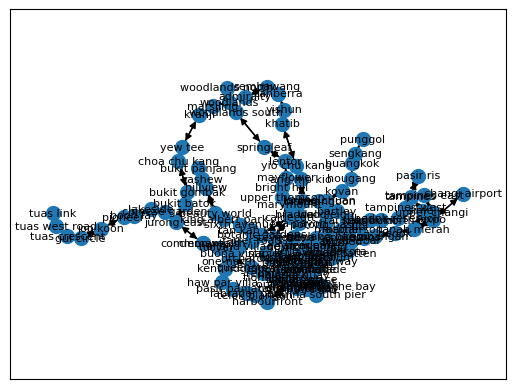

In [23]:
plot_mrt_graph(G, df_mrt_stations)

#NOTE: Had to make some minor changes to the util function as my version of networkx is probably different

### 2.1 Implementing Closeness Centrality (4 Points)

The Closeness Centrality of a node $v$ is defined as

$$
closeness(v) = \frac{N}{\sum_{w\in V}d(v,w)}
$$

where $N$ is the number of nodes that can be reached from $v$, and $d(v,w)$ is the length of the shortest path between node $v$ and a node $w$.

We saw that both distance-based centrality measure Closeness and Betweenness require the to solve the All-Pairs Shortest Paths (APSP) problem. Since this is not a "programming" or "algorithms and data structures" module, we don't expect you to come up with your own solution for the problem from scratch. For this task, you can utilize any method from [`nx.algorithms.shortest_paths`](https://networkx.org/documentation/stable/reference/algorithms/shortest_paths.html). Using a method to compute the shortest path between two nodes will make the computation of Closeness Centrality pretty straightforward.

**Implement method `closeness()` to compute the Closeness Centrality of a Graph G.** You can assume the input Graph G being strongly connected, undirected, and unweighted.

You can use the code cell below to test your implementation.

In [24]:
my_closeness_scores = closeness(G)

for station, score in sorted(my_closeness_scores.items(), key=lambda kv: kv[1], reverse=True)[:5]:
    print('{} ({:.5f})'.format(station, score))

stevens (0.14504)
little india (0.14488)
newton (0.14488)
caldecott (0.14425)
botanic gardens (0.14149)


**Compare your implementation with the one from NetworkX**. The code cell below computes the Closeness Centrality over the *undirected* MRT graph using the implementation from NetworkX, and again shows the 5 MRT stations with the highest scores. *Important:* The NetworkX implementation uses a slightly different definition of the Closeness Centrality. The exact values (typically from the 3rd decimal position onward) will differ a bit. However, the values should be very similar and the ranking of the top-5 MRT stations should be the same.

In [25]:
nx_closeness_scores = nx.algorithms.centrality.closeness_centrality(G, wf_improved=False)

for station, score in sorted(nx_closeness_scores.items(), key=lambda kv: kv[1], reverse=True)[:5]:
    print('{} ({:.5f})'.format(station, score))

stevens (0.14504)
little india (0.14488)
newton (0.14488)
caldecott (0.14425)
botanic gardens (0.14149)


### 2.2 Implementing PageRank Centrality (8 Points)

In this task, you will implement the basic PageRank algorithm using the Power Iteration methods as introduced in the lecture.

$$
c_{PR} = \alpha M c_{PR} + (1-\alpha)E
$$

where $E = (1/n, 1/n, ..., 1/n)^T$ with $n$ being the number of nodes.

Recall from the lecture that PageRank requires the **transition matrix** of a graph is input. For this, we provide you with the method `create_transition_matrix(A)` that converts the adjacency matrix of a Graph G into an transition matrix. Check out also the given code in method `pagerank()` where we use a numpy method to convert the Graph G to its adjacency matrix and then call `create_transition_matrix(A)`.

**Implement method `pagerank()` to compute the PageRank Centrality of a Graph G**.  You can assume the input Graph G being strongly connected, directed, and unweighted.

You can use the code cell below to test your implementation.

In [26]:
my_pagerank_scores = pagerank(G)

for station, score in sorted(my_pagerank_scores.items(), key=lambda kv: kv[1], reverse=True)[:5]:
    print('{} ({:.5f})'.format(station, score))

#NOTE. for dhoby ghaut actual value is 0.012886 which has been rounded to 0.01289

Reached convergence
outram park (0.01646)
marina bay (0.01470)
woodlands (0.01347)
tampines (0.01312)
dhoby ghaut (0.01289)


**Compare your implementation with the one from NetworkX**. The code cell below computes the PageRank Centrality over the *directed* MRT graph using the implementation from NetworkX, and again shows the 5 MRT stations with the highest scores. Apart from minor precision issues, the NetworkX result and your result should match, of course. Note that your implementation and the one of NetworkX are using the same default value for `alpha` and `eps` (called `tol` in case of NetworkX).

In [27]:
nx_pagerank_scores = nx.pagerank(G)

for station, score in sorted(nx_pagerank_scores.items(), key=lambda kv: kv[1], reverse=True)[:5]:
    print('{} ({:.5f})'.format(station, score))

outram park (0.01646)
marina bay (0.01470)
woodlands (0.01347)
tampines (0.01312)
dhoby ghaut (0.01288)


### 2.3 Comparing Centrality Measures (8 Points)

We saw in the lecture that different centrality measures look at different topological features of a graph to quantify the importance of nodes. This task compares different measures, using the following implementations provided by `networkX`:

* [nx.algorithms.link_analysis.pagerank](https://networkx.org/documentation/networkx-1.10/reference/generated/networkx.algorithms.link_analysis.pagerank_alg.pagerank.html)
* [nx.centrality.in_degree_centrality](https://networkx.org/documentation/networkx-1.10/reference/generated/networkx.algorithms.centrality.in_degree_centrality.html#networkx.algorithms.centrality.in_degree_centrality)
* [nx.centrality.out_degree_centrality](https://networkx.org/documentation/networkx-1.10/reference/generated/networkx.algorithms.centrality.out_degree_centrality.html#networkx.algorithms.centrality.out_degree_centrality)
* [nx.centrality.closeness_centrality](https://networkx.org/documentation/networkx-1.10/reference/generated/networkx.algorithms.centrality.closeness_centrality.html#networkx.algorithms.centrality.closeness_centrality)
* [nx.centrality.betweenness_centrality](https://networkx.org/documentation/networkx-1.10/reference/generated/networkx.algorithms.centrality.betweenness_centrality.html)

(**Note:** [nx.algorithms.link_analysis.pagerank](https://networkx.org/documentation/networkx-1.10/reference/generated/networkx.algorithms.link_analysis.pagerank_alg.pagerank.html) might give a (slightly) different ranking than your own implementation of PageRank since this implementation is a bit modified. So don't take this as a 1:1 reference to check your PageRank implementation.)

#### 2.3 a) Run Off-The-Shelf Centrality Algorithms (3 Points)

Run the 5 centrality measures on the MRT train network graph! Find the top-5 MRT stations with respect to their centrality scores and complete the table below. You only need to add the name of the MRT stations, not the scores. Keep in mind that different centrality measures assume a directed or undirected graph. While most algorithms will work on directed graphs, we consider the basic implementations covered in the lecture. In short, use `G_undirected` for Closeness and Betweenness.

Use the code cell below to show how you get to the results; use the default values for all 5 implementations of the centrality measures.


| Rank | PageRank    | InDegree    | OutDegree   | Closeness       | Betweenness     |
| ---  |-------------|-------------|-------------|-----------------|-----------------|
| 1    | outram park | outram park | outram park | stevens         | botanic gardens |
| 2    | marina bay  | dhoby ghaut | dhoby ghaut | little india    | caldecott       |
| 3    | woodlands   | marina bay  | marina bay  | newton          | buona vista     |
| 4    | tampines    | stevens     | stevens     | caldecott       | bishan          |
| 5    | dhoby ghaut | serangoon   | serangoon         | botanic gardens | newton          |

In [28]:
#########################################################################################
### Your code starts here ###############################################################

# All centralities
pagerank_centrality_scores = nx.algorithms.link_analysis.pagerank(G)
indegree_centrality_scores = nx.centrality.in_degree_centrality(G)
outdegree_centrality_scores = nx.centrality.out_degree_centrality(G)
closeness_centrality_scores = nx.centrality.closeness_centrality(G_undirected)
betweenness_centrality_scores = nx.centrality.betweenness_centrality(G_undirected)

# Get the top5 ranks
pagerank_top5 = sorted(pagerank_centrality_scores.items(), key=lambda kv: kv[1], reverse=True)[:5]
indegree_top5 = sorted(indegree_centrality_scores.items(), key=lambda kv: kv[1], reverse=True)[:5]
outdegree_top5 = sorted(outdegree_centrality_scores.items(), key=lambda kv: kv[1], reverse=True)[:5]
closeness_top5 = sorted(closeness_centrality_scores.items(), key=lambda kv: kv[1], reverse=True)[:5]
betweenness_top5 = sorted(betweenness_centrality_scores.items(), key=lambda kv: kv[1], reverse=True)[:5]

# Print the values
for idx, centralities in enumerate(zip(pagerank_top5, indegree_top5, outdegree_top5, closeness_top5, betweenness_top5)):
    rank = idx + 1
    p, i, o, c, b = centralities
    print(f"#{rank} | PR: {p[0]} | ID: {i[0]} | OD: {o[0]} | C: {c[0]} | B: {b[0]}")
    # print(f"#{rank} | PR: {p[1]} | ID: {i[1]} | OD: {o[1]} | C: {c[1]} | B: {b[1]}")
    print("_"* 80)

### Your code ends here #################################################################
#########################################################################################

#1 | PR: outram park | ID: outram park | OD: outram park | C: stevens | B: botanic gardens
________________________________________________________________________________
#2 | PR: marina bay | ID: dhoby ghaut | OD: dhoby ghaut | C: little india | B: caldecott
________________________________________________________________________________
#3 | PR: woodlands | ID: marina bay | OD: marina bay | C: newton | B: buona vista
________________________________________________________________________________
#4 | PR: tampines | ID: stevens | OD: stevens | C: caldecott | B: bishan
________________________________________________________________________________
#5 | PR: dhoby ghaut | ID: serangoon | OD: serangoon | C: botanic gardens | B: newton
________________________________________________________________________________


#### 2.3 b) Discussion of Results (5 Points)

Discuss the results and your observations! Based on the definitions and intuitions behind these 5 different centrality measures, discuss the results of 2.3 a): For each centrality, briefly describe what it means for a MRT station to have the highest score!

**Your answer:**

I. <u><b> What does each centrality measure intuitively? </b></u>
* <b>PageRank:</b> High PageRank signifies a station's influence in the network, reflecting its connectivity and importance in connecting multiple lines or serving as a major destination.
* <b>In-Degree:</b> High in-degree indicates that a station is a major convergence point with many lines leading to it.
* <b>Out-Degree:</b> High out-degree implies that a station provides access to many other stations, emphasizing its role as a major interchange.
* <b>Closeness Centrality:</b> High closeness centrality suggests that a station is centrally located, providing efficient travel to other stations.
* <b>Betweenness Centrality:</b> High betweenness centrality indicates that a station acts as a crucial connector or bridge between different parts of the network.

II. <u><b> Intepretation of results </b></u>

1. <b>PageRank:</b>
* Outram Park (1st): High PageRank indicates that Outram Park is a central hub, connecting various MRT lines. Located near the central business district, it serves as a major interchange point and medical hub with hospitals like Singapore General Hospital.
* Marina Bay (2nd): High PageRank reflects Marina Bay's role as a major interchange station in the heart of Singapore's business and entertainment district, contributing  to its prominence and connectivity.
* Woodlands (3rd): Woodlands' high PageRank is influenced by its status as a major interchange connecting the North-South and Thomson-East Coast Lines. The station is strategically located in the northern part of Singapore, fostering residential and commercial developments.
* Tampines (4th): Tampines' high PageRank suggests its importance as an interchange in the eastern part of Singapore, contributing to its status as a regional center known for shopping, education, and residential developments.
* Dhoby Ghaut (5th): Dhoby Ghaut's high PageRank signifies its central role in connecting multiple lines in the city center, contributing to its significance as a shopping and cultural hub.

2. <b>In-Degree:</b>
* Outram Park (1st): High in-degree indicates that Outram Park is a major convergence point with multiple lines leading to it. Its central location contributes to its in-degree centrality.
* Dhoby Ghaut (2nd): Dhoby Ghaut's high in-degree reflects its role as a significant convergence point, connecting multiple lines in the city center.
* Marina Bay (3rd): Marina Bay's high in-degree is influenced by its status as a major destination and interchange in the city center, attracting high commuter traffic.
* Stevens (4th): Stevens' relatively high in-degree suggests its role as an interchange and convergence point, connecting different lines in the central region.
* Serangoon (5th): Serangoon's high in-degree signifies its importance as a hub where multiple lines intersect, contributing to its connectivity.

3. <b>Out-Degree:</b>
* Outram Park (1st): High out-degree implies that Outram Park provides access to many other stations, emphasizing its role as a major interchange with extensive connectivity.
* Dhoby Ghaut (2nd): Dhoby Ghaut's high out-degree indicates its function as a hub connecting to various other stations, facilitating travel across the network.
* Marina Bay (3rd): Marina Bay's high out-degree signifies its role in offering connectivity to multiple destinations, contributing to its importance.
* Stevens (4th): Stevens' relatively high out-degree suggests that it provides access to different parts of the network, serving as a central point for travelers.
* Serangoon (5th): Serangoon's high out-degree indicates its significance as a station with multiple outgoing connections, facilitating travel to various destinations.

4. <b>Closeness Centrality:</b>
* Stevens (1st): High closeness centrality indicates that Stevens is centrally located, providing efficient travel to other stations in the MRT system. It is situated in the Bukit Timah area known for its residential developments and green spaces.
* Little India (2nd): Little India's high closeness centrality suggests its central location and efficiency in reaching other stations. The station is located in the vibrant Little India district, known for its cultural richness and markets.
* Newton (3rd): Newton's high closeness centrality reflects its central location, allowing for quick travel to other parts of the network. It is situated in a residential area known for its historic architecture.
* Caldecott (4th): Caldecott's relatively high closeness centrality indicates its well-positioned location for efficient travel within the MRT system. It is situated near the MacRitchie Reservoir, contributing to a mix of residential and natural surroundings.
* Botanic Gardens (5th): Botanic Gardens' high closeness centrality indicates its central location and efficiency in reaching other stations. The station is located in the UNESCO-listed Singapore Botanic Gardens, enhancing its significance.

5. <b>Betweenness Centrality:</b>
* Botanic Gardens (1st): High betweenness centrality suggests that Botanic Gardens acts as a crucial connector between different parts of the MRT network. Its location near the Singapore Botanic Gardens adds to its significance.
* Caldecott (2nd): Caldecott's high betweenness centrality suggests its role as a bridge connecting different sections of the network. It is located near the Caldecott Broadcast Centre and Toa Payoh Town Park.
* Buona Vista (3rd): Buona Vista's high betweenness centrality indicates its role as a bridge between different parts of the network. It is located near one-north, a research and business park.
* Bishan (4th): Bishan's relatively high betweenness centrality suggests its significance in connecting different paths in the MRT system. It is located in a residential area with proximity to Bishan-Ang Mo Kio Park.
* Newton (5th): Newton's high betweenness centrality indicates its importance in facilitating travel between various stations. It is located near the Orchard Road shopping district.
